In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 14)

In [33]:
df_corona = pd.read_csv('transformed_data.csv')

In [34]:
df_corona.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [35]:
df_corona.shape

(50418, 9)

In [36]:
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


##### Summary

- Total number of entries are 50418.
- Total number of features are 13.
- There are categorical and numerical variables.
- Numerical variables are of datatype int64, float64.
- Target variable is TC
- There are null values
- Nedd to covert DATE variable
- Need to drop CODE.

In [39]:
df_corona.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


### Cleaning the data

In [41]:
# Droping the unecessary features
df_corona.drop(['CODE'], axis=1, inplace = True)

In [44]:
# Coverting date object into datetime
df_corona['DATE'] = pd.to_datetime(df_corona['DATE'])

In [45]:
# Creating separate feature for year, month, data
df_corona['year'] = pd.to_datetime(df_corona['DATE']).dt.year
df_corona['month'] = pd.to_datetime(df_corona['DATE']).dt.month

In [46]:
df_corona.columns

Index(['COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP', 'year',
       'month'],
      dtype='object')

In [47]:
df_corona = df_corona.rename(columns={'COUNTRY' : 'Country', 'year' : 'Year', 'month': 'Month', 'DATE':'Date', 'POP' :'Population', 'GDPCAP' :'GDP_Cap', 'HDI' :'HDI', 'STI' : 'Stringency_Index', 'TC' :'Cases', 'TD' :'Deaths'})

In [48]:
df_corona = df_corona[['Country','Year','Month','Date','Population','GDP_Cap','HDI','Stringency_Index','Cases', 'Deaths']]

In [49]:
# Finding the missing values and coverting into percentage

df_corona.isnull().mean()

Country             0.000000
Year                0.000000
Month               0.000000
Date                0.000000
Population          0.000000
GDP_Cap             0.000000
HDI                 0.123012
Stringency_Index    0.000000
Cases               0.000000
Deaths              0.000000
dtype: float64

#### Insights:

- HDI contains missing values about 12%

<AxesSubplot: xlabel='Deaths', ylabel='Count'>

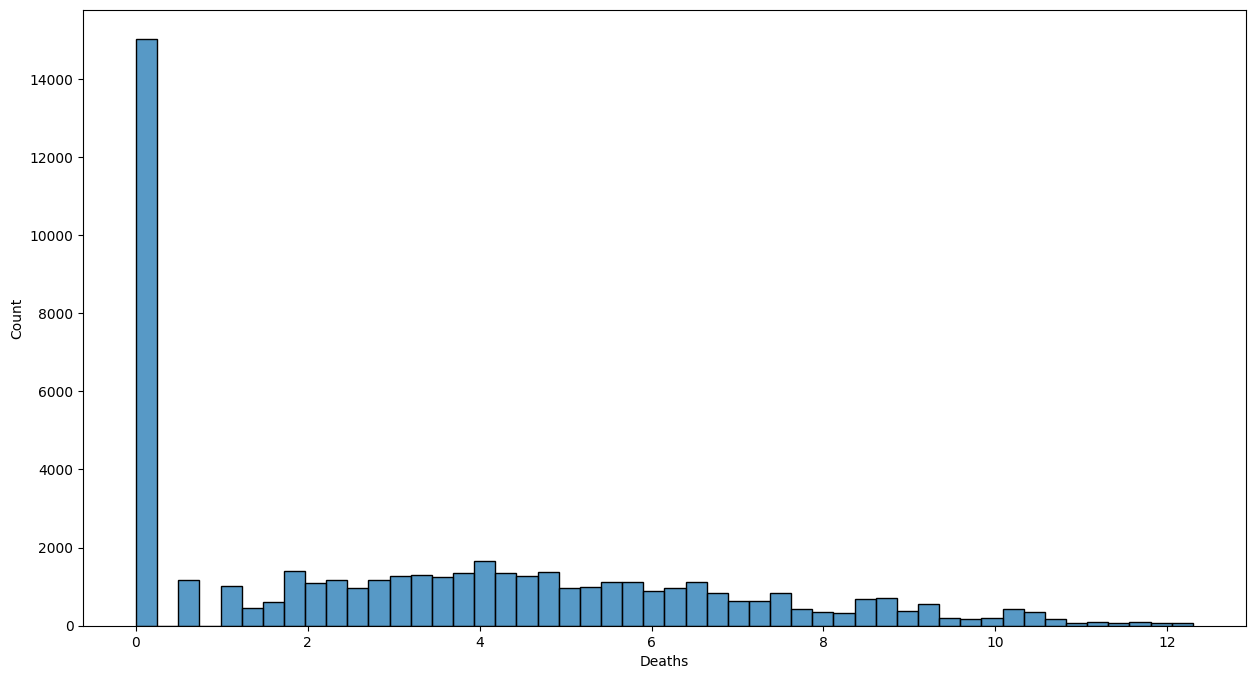

In [50]:
#plotting the distribution of total_deaths

sns.histplot(data = df_corona, x='Deaths', bins=50)

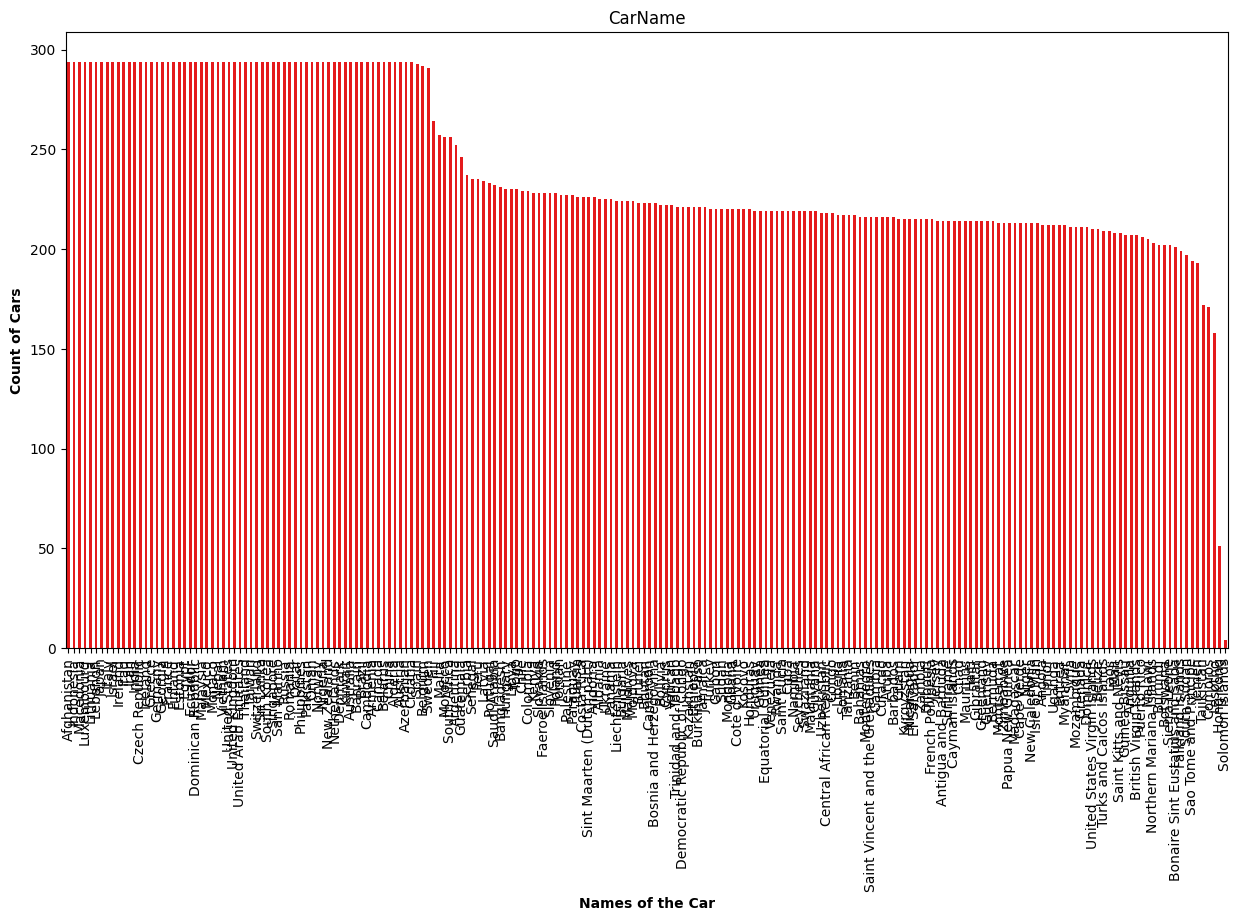

In [51]:

plt.rcParams['figure.figsize'] = [15,8]
ax=df_corona['Country'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

### Insights:

- Normal distribution of data can see

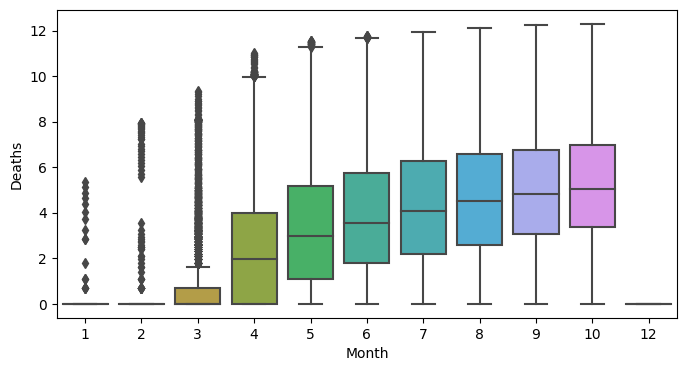

In [52]:
# Relationship between month and Deaths
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'Month', y = 'Deaths', data = df_corona)
plt.show()

<AxesSubplot: xlabel='Cases', ylabel='Deaths'>

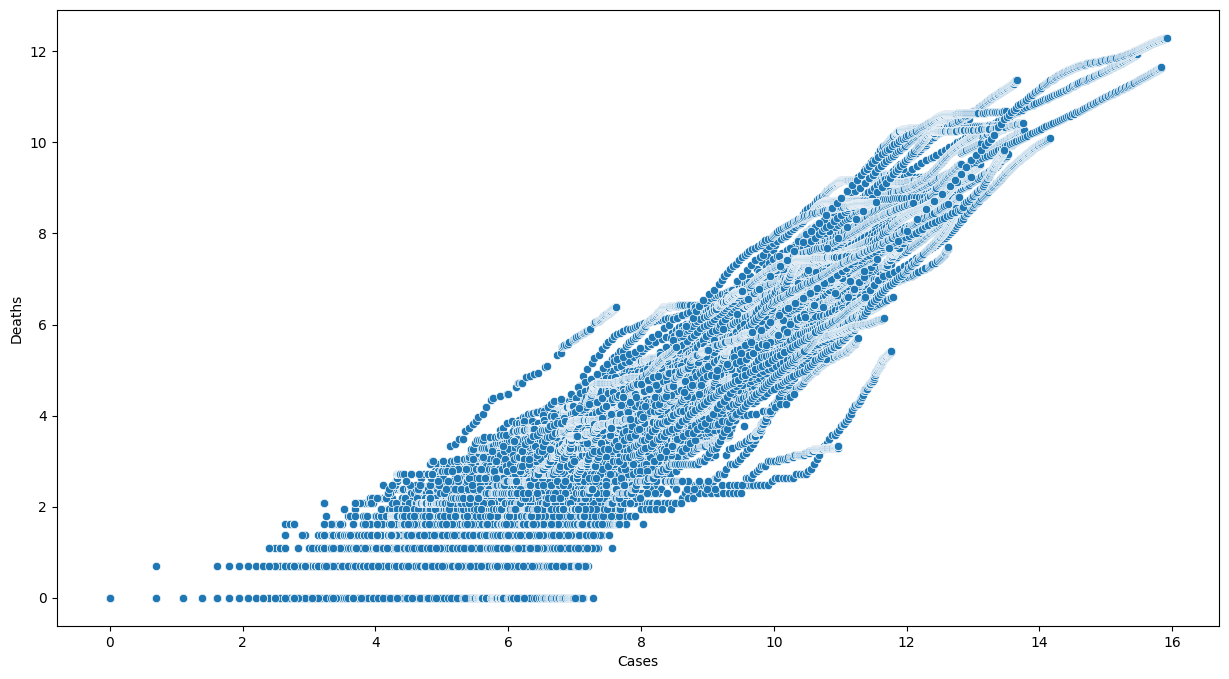

In [53]:
sns.scatterplot(data = df_corona, x='Cases', y='Deaths')

Text(0.5, 1.0, 'Relation between HDI and Covid-19 cases')

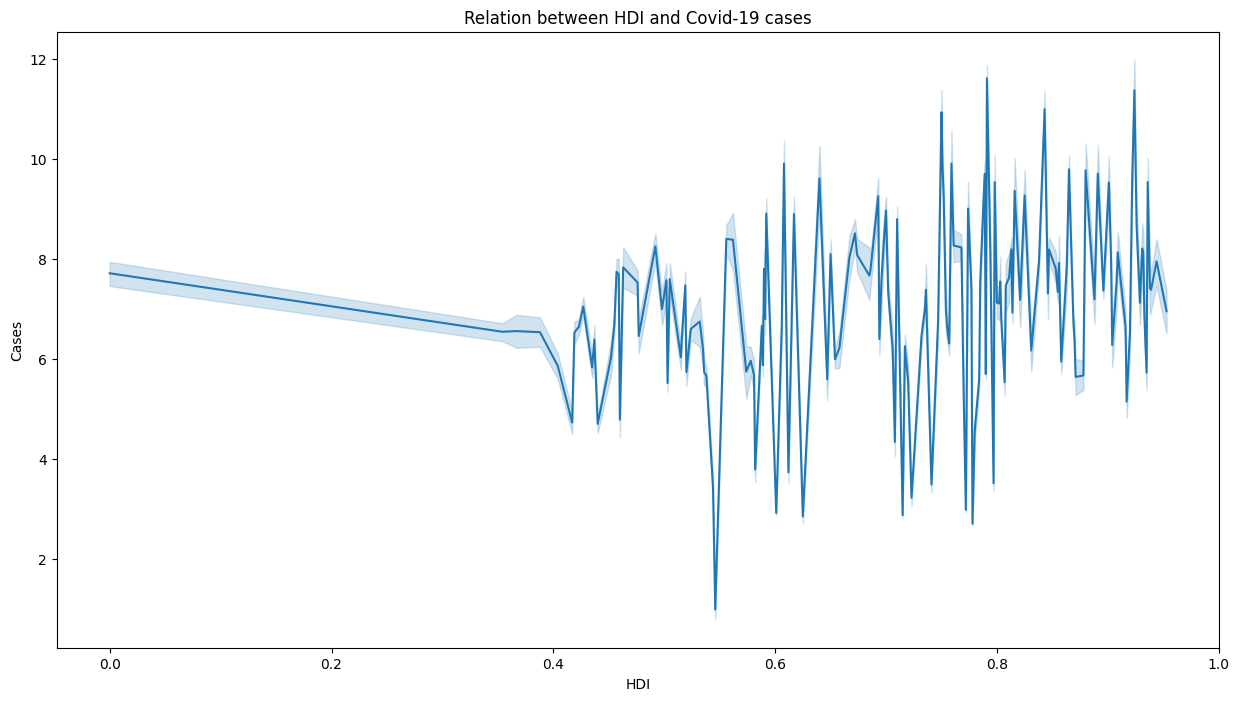

In [54]:
sns.lineplot(data=df_corona[['HDI', 'Cases']], x="HDI", y="Cases").set_title('Relation between HDI and Covid-19 cases')

Text(0.5, 1.0, 'Relation between HDI and GDP per capita')

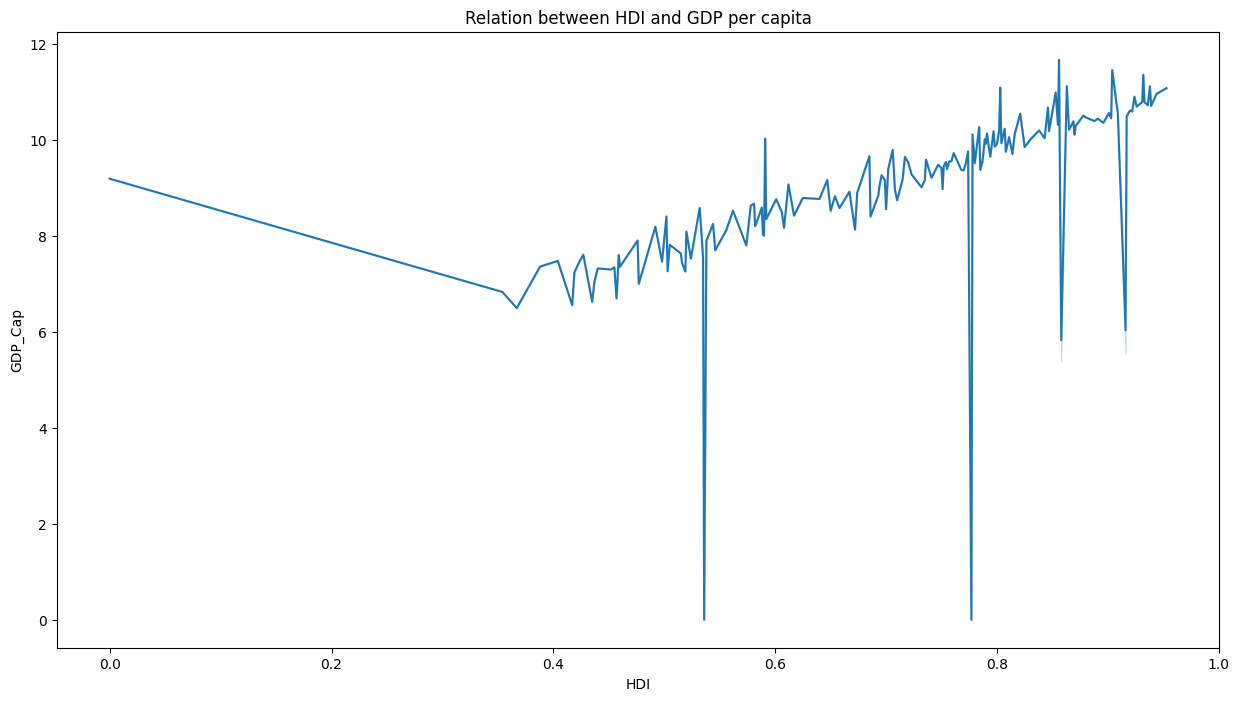

In [55]:
sns.lineplot(data=df_corona[['HDI', 'GDP_Cap']], x="HDI", y="GDP_Cap").set_title('Relation between HDI and GDP per capita')

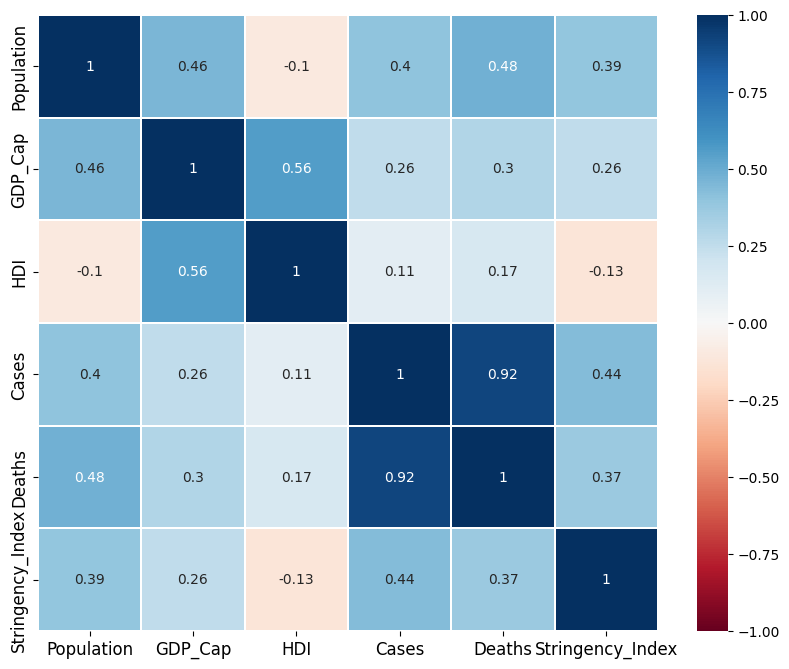

In [56]:
cor = df_corona[['Population', 'GDP_Cap', 'HDI', 'Cases', 'Deaths', 'Stringency_Index']].corr()
sns.heatmap(cor, annot=True, linewidths=0.2, cmap="RdBu", vmin=-1, vmax=1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

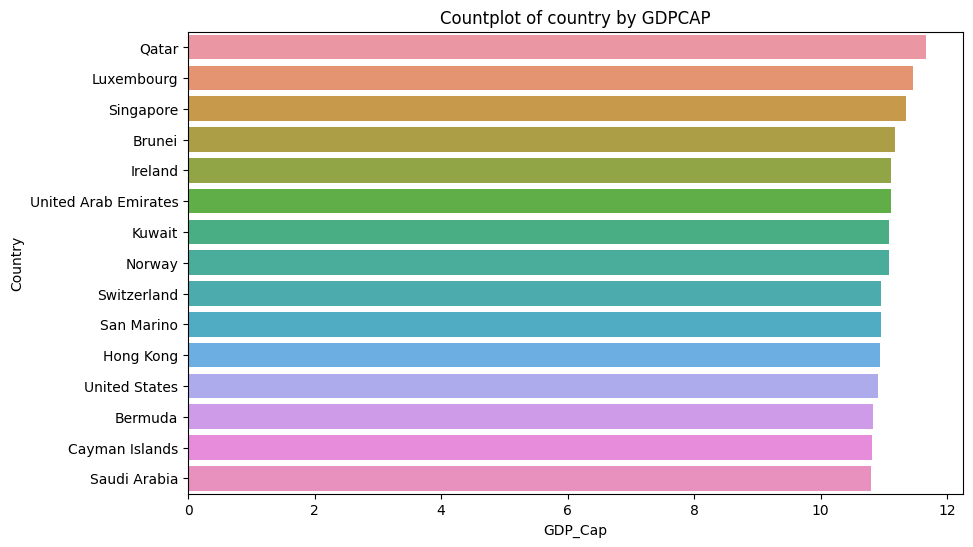

In [57]:
gdp = df_corona.sort_values(by='GDP_Cap', ascending=False)[:3800]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=gdp.Country, x=gdp.GDP_Cap)
plt.xticks()
plt.xlabel('GDP_Cap')
plt.ylabel('Country')
plt.title('Countplot of country by GDPCAP')
plt.show()

#### Analysing numerical variables

In [61]:
numeric_dtypes = ['int64', 'float64']
numerical_cols = df_corona.select_dtypes(include = numeric_dtypes).columns

In [62]:
numerical_cols

Index(['Year', 'Month', 'Population', 'GDP_Cap', 'HDI', 'Stringency_Index',
       'Cases', 'Deaths'],
      dtype='object')

In [64]:
df_corona[numerical_cols]

,Year,Month,Population,GDP_Cap,HDI,Stringency_Index,Cases,Deaths
0,2019,12,17.477233,7.497754,0.498,0.000000,0.000000,0.000000
1,2020,1,17.477233,7.497754,0.498,0.000000,0.000000,0.000000
2,2020,1,17.477233,7.497754,0.498,0.000000,0.000000,0.000000
3,2020,1,17.477233,7.497754,0.498,0.000000,0.000000,0.000000
4,2020,1,17.477233,7.497754,0.498,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
50413,2020,10,16.514381,7.549491,0.535,4.341855,8.994048,5.442418
50414,2020,10,16.514381,7.549491,0.535,4.341855,8.996528,5.442418
50415,2020,10,16.514381,7.549491,0.535,4.341855,8.999496,5.442418
50416,2020,10,16.514381,7.549491,0.535,4.341855,9.000853,5.442418


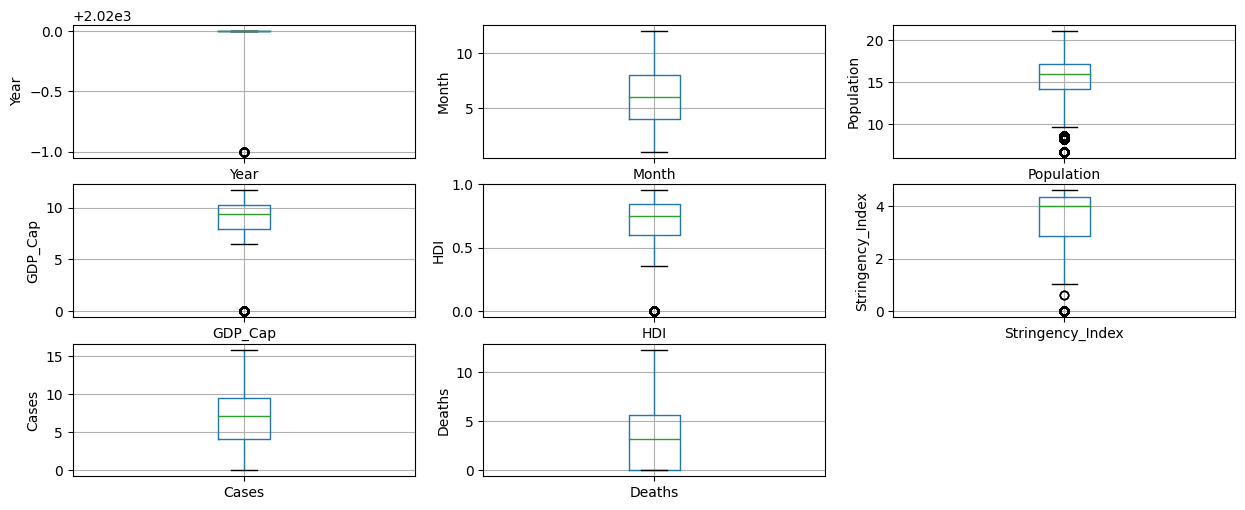

In [67]:
#Checking outliers
plt.figure(figsize=(15,10))
n=1
for feature in df_corona[numerical_cols].columns:
    plt.subplot(5, 3, n)
    fig = df_corona.boxplot(column= feature)
    fig.set_title('')
    fig.set_ylabel(feature)
    n+=1

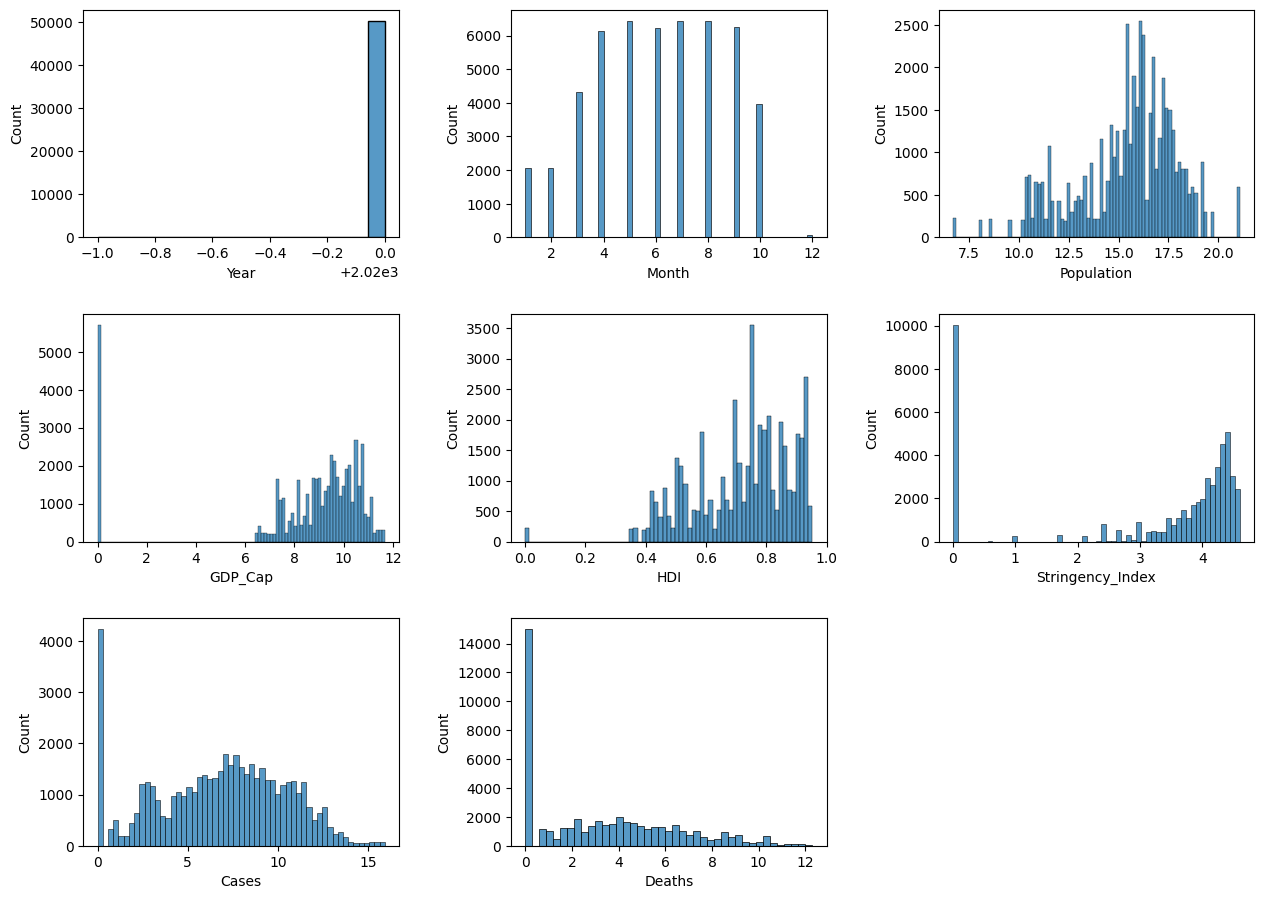

In [68]:
#Checking the distribution of variables
plt.figure(figsize=(15,10))
n=1
for feature in df_corona[numerical_cols].columns:
    plt.subplot(5, 3, n)
    plt.tight_layout(pad=2)
    fig = plt.gcf()
    fig.set_size_inches(13, 15)
    sns.histplot(data=df_corona, x= feature)
    n+=1

In [69]:
# find outliers for numerical variables

for feature in df_corona[numerical_cols].columns:
    IQR = df_corona[feature].quantile(0.75) - df_corona[feature].quantile(0.25)
    Lower_fence = round((df_corona[feature].quantile(0.25) - (IQR * 1.5)), 3)
    Upper_fence = round((df_corona[feature].quantile(0.75) + (IQR * 1.5)), 3)
    print(feature, 'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    if Lower_fence < df_corona[feature].min() and Upper_fence >  df_corona[feature].max():
        print('For{}, outliers are less than {} and greater than {} \n' .format(feature, df_corona[feature].min(), df_corona[feature].max()))
    elif Lower_fence < df_corona[feature].min():
        print('For{}, outliers are less than {}  \n' .format(feature, df_corona[feature].min()))
    elif Upper_fence >  df_corona[feature].max():
        print('For{}, outliers are greater than {} \n' .format(feature, df_corona[feature].max()) )

Year outliers are values < 2020.0 or > 2020.0
Month outliers are values < -2.0 or > 14.0
ForMonth, outliers are less than 1 and greater than 12 

Population outliers are values < 9.598 or > 21.741
ForPopulation, outliers are greater than 21.08743924 

GDP_Cap outliers are values < 4.532 or > 13.661
ForGDP_Cap, outliers are greater than 11.66937863 

HDI outliers are values < 0.232 or > 1.216
ForHDI, outliers are greater than 0.953 

Stringency_Index outliers are values < 0.665 or > 6.539
ForStringency_Index, outliers are greater than 4.605170186 

Cases outliers are values < -3.86 or > 17.523
ForCases, outliers are less than 0.0 and greater than 15.91409213 

Deaths outliers are values < -8.431 or > 14.051
ForDeaths, outliers are less than 0.0 and greater than 12.29989991 



### Insights:

- There are 8 numerical features
- Population, GDP_cap, HDI, Stringency_index contains outliers 

#### Analysing categorical variables

In [75]:
categorical_cols = df_corona.select_dtypes(include = 'object').columns

In [76]:
categorical_cols

Index(['Country'], dtype='object')

In [77]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df_corona[var].unique()), ' labels')

Country  contains  210  labels


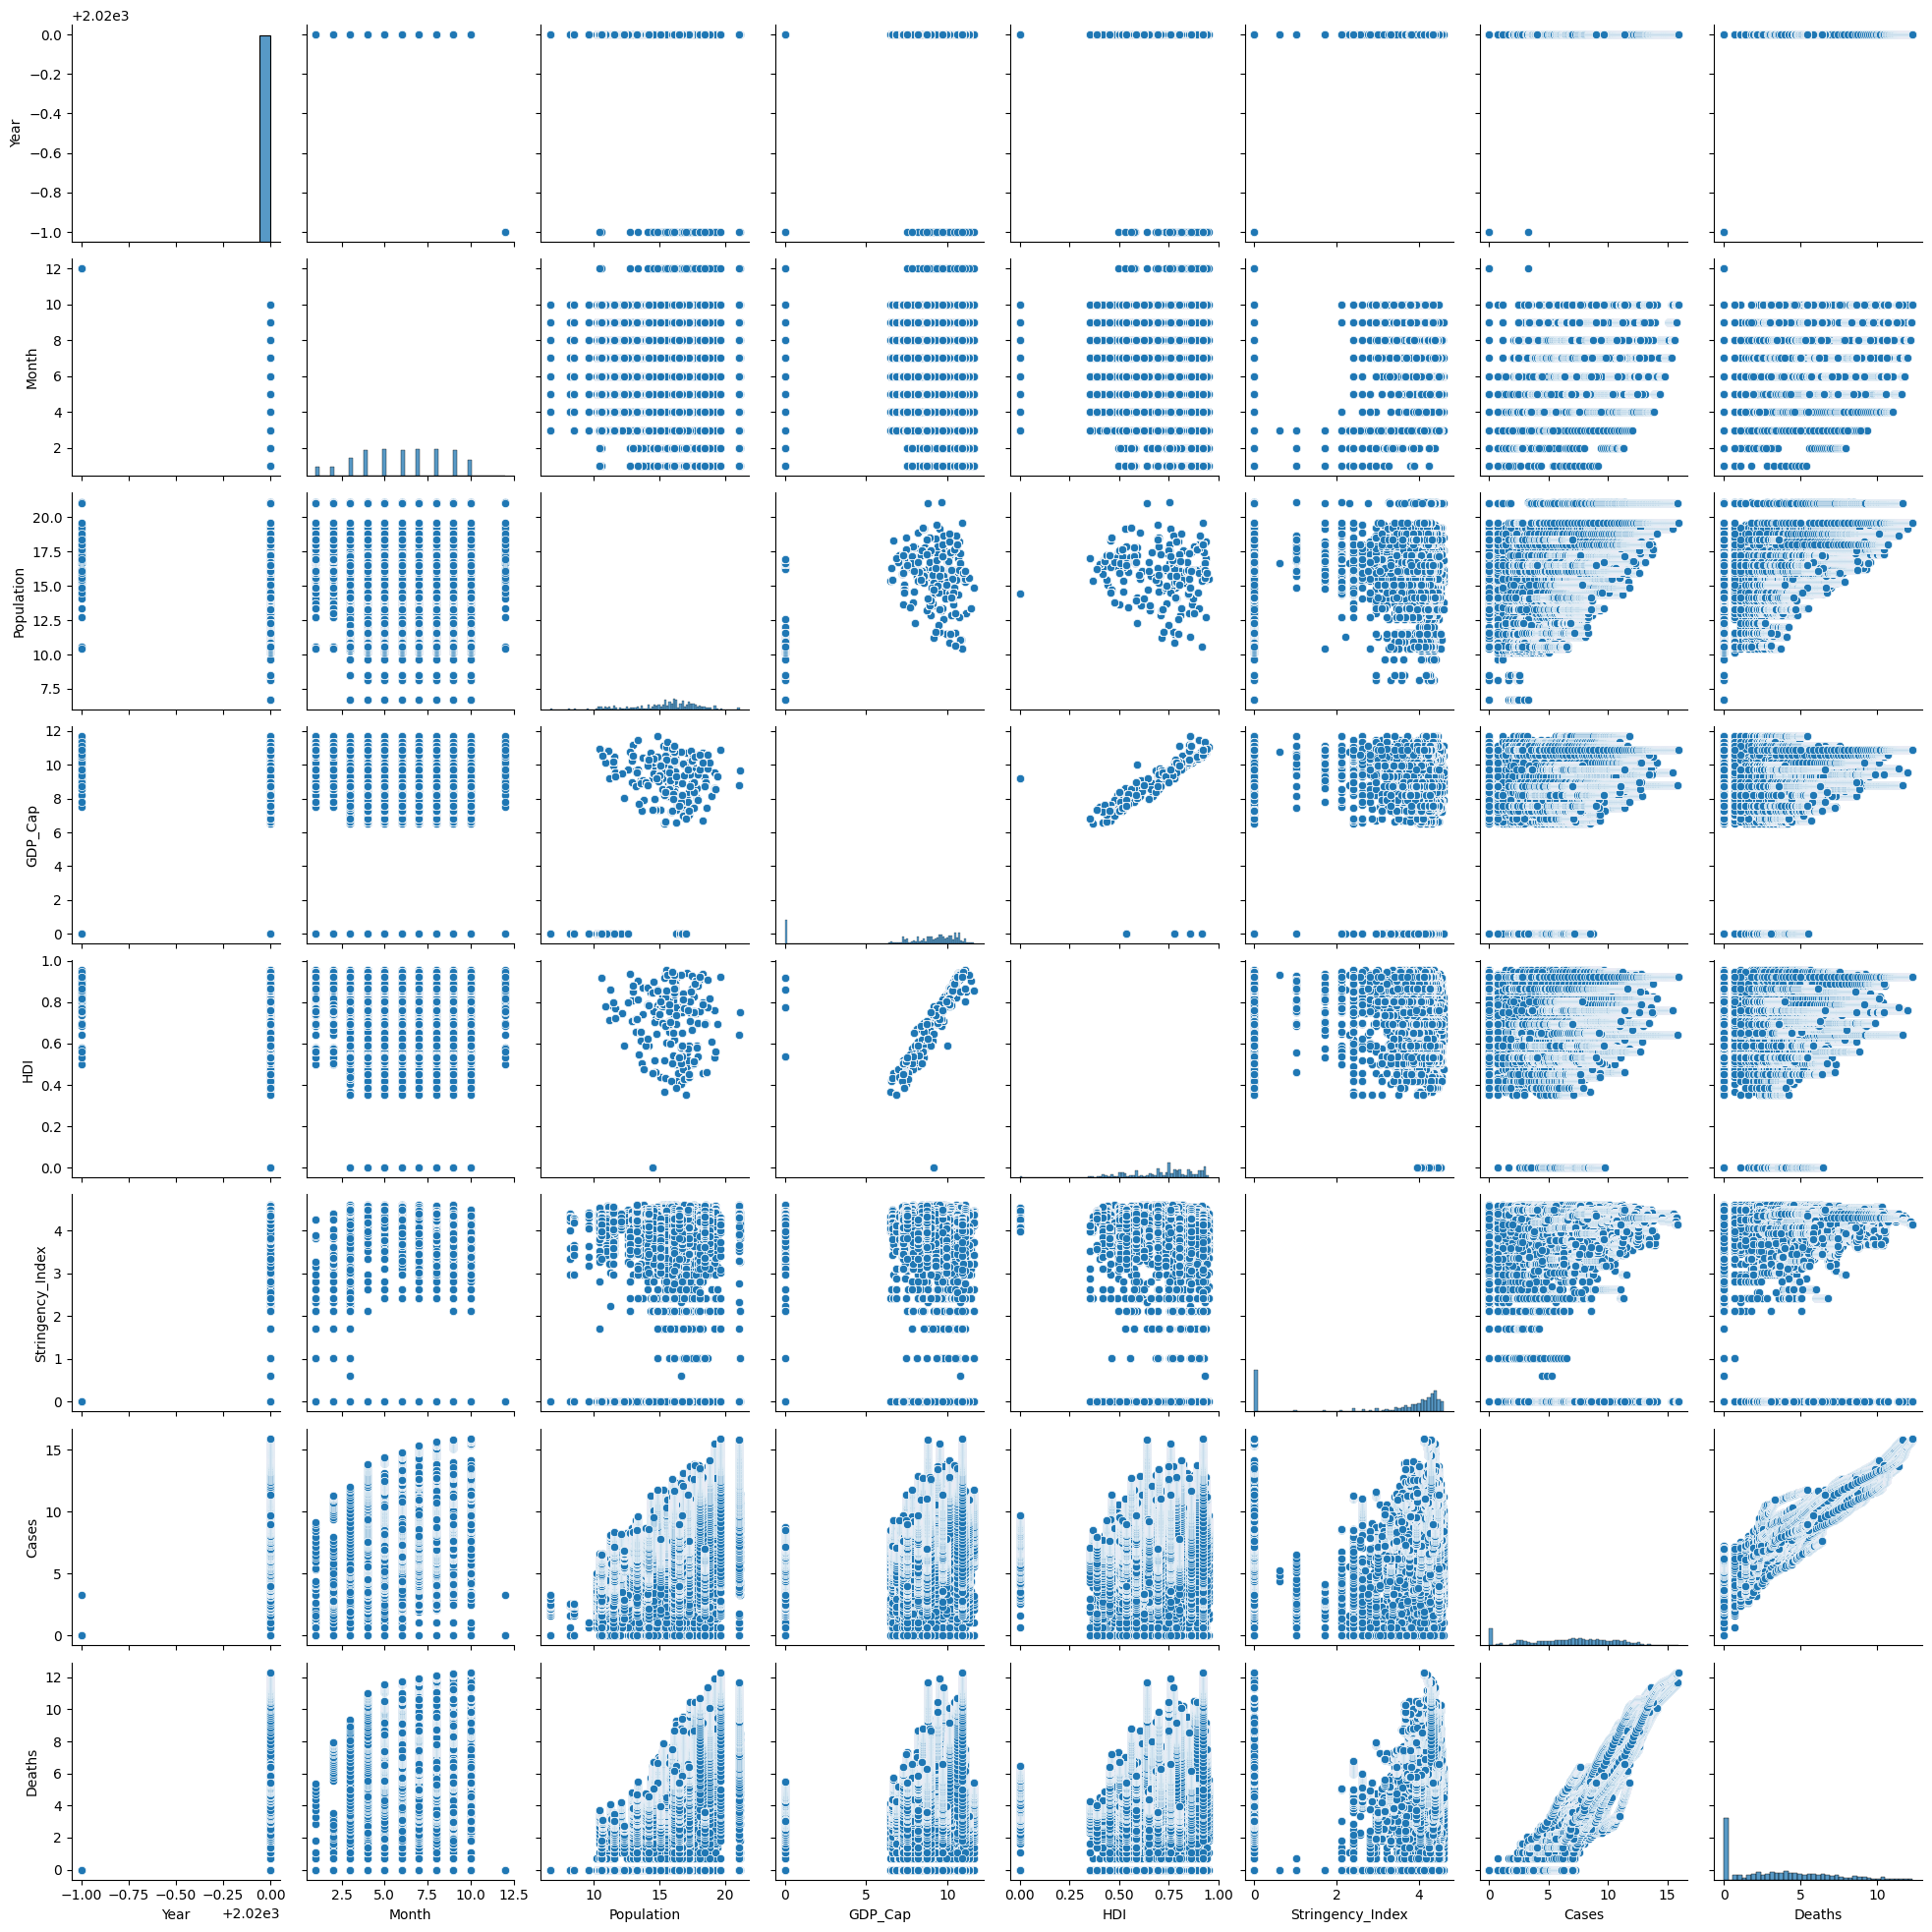

In [80]:
# Pairplot tho see the relationship of hightly positively correlated variables

sns.pairplot(data = df_corona[numerical_cols], kind='scatter', diag_kind='hist')
plt.show()